In [299]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#for modelling
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [83]:
data = pd.read_csv('C:/Users/hbati/Ironhack/Cases/AME/survey_results_public.csv',low_memory=False)

In [84]:
data #98855 entries

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98850,101513,Yes,Yes,United States,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98851,101531,No,Yes,Spain,"Yes, full-time","Not employed, but looking for work",NaN,NaN,NaN,Back-end developer;Front-end developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98852,101541,Yes,Yes,India,"Yes, full-time",Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98853,101544,Yes,No,Russian Federation,No,"Independent contractor, freelancer, or self-em...",Some college/university study without earning ...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<!--
• Salário vazio ou com valor “NA” deve ser convertido para zero (0.0).
    # done
• Salário deve ser sempre calculado em reais e mensal. Para esse cálculo você usará a coluna
ConvertedSalary, que contém o salário anual. Considere que 1 dólar equivale a R$3,81.
    # done, but with updated exchange rate of R$5,15
• O nome dos respondentes deve seguir a regra respondente_[número] . (ex: respondente_1,
respondente_2, respondente_3). O critério de geração desse número é todo seu.
• Cada linha da tabela linguagem_programacao deve conter uma única linguagem de
programação.
• Cada linha da tabela ferramenta_comunic deve conter apenas uma ferramenta de
comunicação.
-->

In [85]:
data[['Currency','Salary','SalaryType','ConvertedSalary']].isna().sum() # convert nans in Salary and Converted Salary to 0.0

# about half of salary information is lost

Currency           36847
Salary             48277
SalaryType         47785
ConvertedSalary    51153
dtype: int64

In [86]:
data['Salary'] = data['Salary'].fillna(0)
data['ConvertedSalary'] = data['ConvertedSalary'].fillna(0)

In [87]:
data[['Currency','Salary','SalaryType','ConvertedSalary']].isna().sum() # done

Currency           36847
Salary                 0
SalaryType         47785
ConvertedSalary        0
dtype: int64

In [88]:
# ConvertedSalaries must be wrong, as exemplified by
    # data.loc[data['Respondent']=='Respondent_4203'][['Respondent','Currency','Salary','SalaryType','ConvertedSalary','CSMR']]
    # and
    # data.loc[data['Respondent']=='Respondent_1450'][['Respondent','Currency','Salary','SalaryType','ConvertedSalary','CSMR']]

# let's fix the Salary column which is by far the most useful

DATA CLEANING

In [89]:
# ordering Respondent data
data[['Respondent']].reset_index()

,index,Respondent
0,0,1
1,1,3
2,2,4
3,3,5
4,4,7
...,...,...
98850,98850,101513
98851,98851,101531
98852,98852,101541
98853,98853,101544


In [90]:
data['Respondent'] = 'Respondent_' +(data['Respondent'].reset_index()['index'] + 1).astype(str)

In [91]:
# Lets change Yes and No to 1 and 0 respectively
data['OpenSource'] = data['OpenSource'].replace({'No': 0, 'Yes': 1})
data['Hobby'] = data['Hobby'].replace({'No': 0, 'Yes': 1})

In [215]:
# lets pull the useful variables so its easier to work with
df = data[['Respondent','Country','Employment','CompanySize','OperatingSystem','DevType','YearsCoding',
'LanguageWorkedWith','CommunicationTools','ConvertedSalary','Gender','Age','Exercise','OpenSource','Hobby']]

print(df.shape)

(98855, 15)


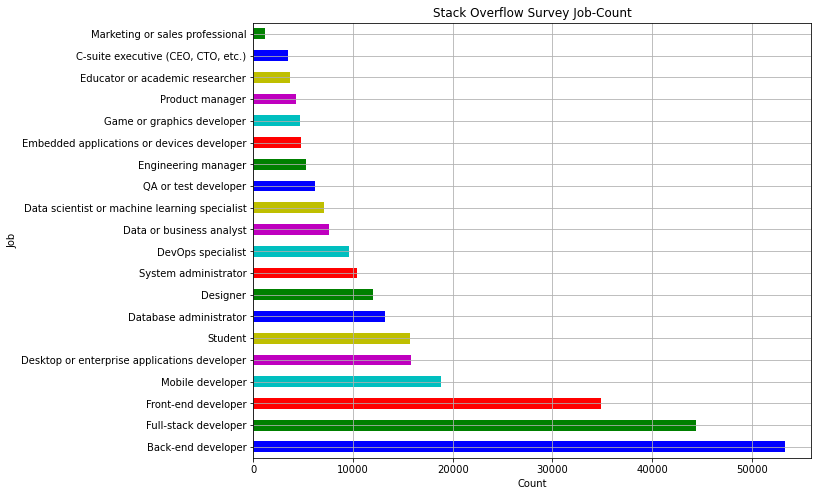

In [216]:
df_jobs = pd.DataFrame.from_records(df['DevType'].dropna().apply(lambda x: x.split(';')).values.tolist()).stack().reset_index(drop=True).value_counts()
c = ['b', 'g', 'r', 'c', 'm','y']

# Create plot
df_jobs.plot(kind='barh', figsize=(10,8),color = c)
plt.title('Stack Overflow Survey Job-Count')
plt.xlabel('Count')
plt.ylabel('Job')
plt.grid()
plt.show()

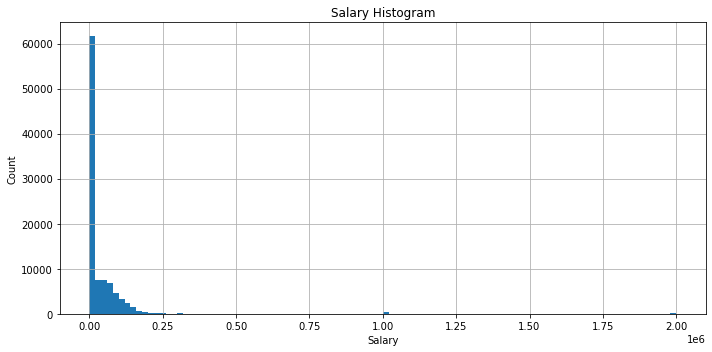

In [217]:
# Create subplots
fig, axarr = plt.subplots(figsize=(10,5))

# Create histogram
df['ConvertedSalary'].hist(bins=100, ax=axarr)
axarr.set_title('Salary Histogram')
axarr.set_xlabel('Salary')
axarr.set_ylabel('Count')
plt.tight_layout()
plt.show()

In [218]:
# Remove the zeroes, and these outliers need to go. I'll cut anyone who makes more than half a million per year, that's just ridiculous.
# Actually only keep people who make >3000 USD/year. That should amount to those that get at least a minimum wage and we won't lose that many people
df = df[(df['ConvertedSalary']>3000) & (df['ConvertedSalary']<500000)]

In [219]:
df.shape # yeah ok that's not so bad

(44083, 15)

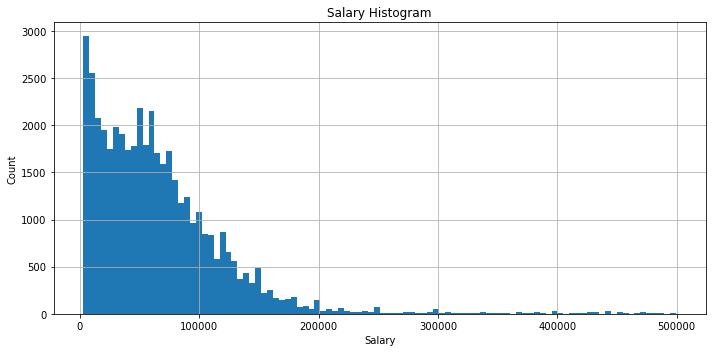

In [220]:
# Create subplots
fig, axarr = plt.subplots(figsize=(10,5))

# Create histogram
df['ConvertedSalary'].hist(bins=100, ax=axarr)
axarr.set_title('Salary Histogram')
axarr.set_xlabel('Salary')
axarr.set_ylabel('Count')
plt.tight_layout()
plt.show()

In [221]:
df['Country'].value_counts()[0:20]

United States         12206
India                  3468
United Kingdom         3425
Germany                3152
Canada                 1868
France                 1339
Russian Federation     1164
Australia              1096
Brazil                 1062
Netherlands             938
Spain                   920
Poland                  910
Italy                   700
Sweden                  651
Switzerland             516
Israel                  432
Ukraine                 411
Austria                 381
Turkey                  366
Belgium                 361
Name: Country, dtype: int64

In [222]:
df['Country'].value_counts()[0:49]

United States                   12206
India                            3468
United Kingdom                   3425
Germany                          3152
Canada                           1868
France                           1339
Russian Federation               1164
Australia                        1096
Brazil                           1062
Netherlands                       938
Spain                             920
Poland                            910
Italy                             700
Sweden                            651
Switzerland                       516
Israel                            432
Ukraine                           411
Austria                           381
Turkey                            366
Belgium                           361
Czech Republic                    354
Denmark                           347
South Africa                      342
Romania                           328
Mexico                            322
Pakistan                          310
Norway      

In [223]:
#I will only keep the first 49 countries, as they have more than 100 respondents each.
df_country = df['Country'].value_counts().head(49)

In [224]:
df = df[df['Country'].isin(df_country.index)]

In [225]:
df.shape # yeah ok that's not so bad

(41817, 15)

In [230]:
# For Gender, I might wanna keep only Males and Females.
df[df['Gender'].isin(['Male', 'Female'])].shape

(38636, 15)

In [231]:
df = df[df['Gender'].isin(['Male', 'Female'])]
#df['Gender'] = df['Gender'].map({'Male':0, 'Female':1})

In [233]:
# 0s and 1s too
df['Gender'] = df['Gender'].map({'Male':0, 'Female':1})

In [234]:
df.shape # yeah ok that's not so bad

(38636, 15)

In [235]:
#Age
df['Age'].isna().sum()

209

In [237]:
df['Age'].value_counts()

25 - 34 years old     20821
35 - 44 years old      7696
18 - 24 years old      7187
45 - 54 years old      2055
55 - 64 years old       515
Under 18 years old       96
65 years or older        57
Name: Age, dtype: int64

In [238]:
# maybe we should reorder this and reindex..
age = ['Under 18 years old',
       '18 - 24 years old',
       '25 - 34 years old',
       '35 - 44 years old',
       '45 - 54 years old',
       '55 - 64 years old',
       '65 years or older']

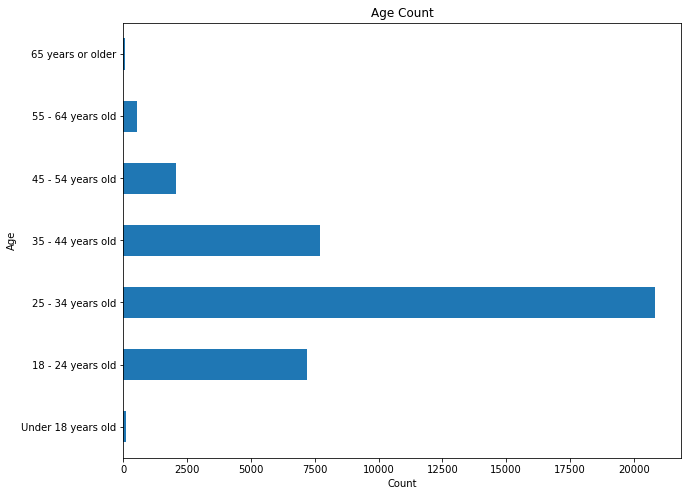

In [242]:
# Create plot
df['Age'].value_counts().reindex(age).plot(kind='barh', figsize=(10,8))
plt.title('Age Count')
plt.xlabel('Count')
plt.ylabel('Age')
plt.show()

In [103]:
#ConvertedSalary: Salary converted to annual USD salaries using the exchange rate on 2018-01-18, assuming 12 working months and 50 working weeks

In [104]:
data[data['Salary'].str.contains(',') == True]['Salary'] # There might be some confusion between ',' and '.' depending on currency? Let's explore..

833         2688,82
1449       35000,00
2365      2,000,000
2506        7080,65
2939     112,000.00
            ...    
87785     35,000.00
87841    500,000.00
87868        455,00
89246      1,500.00
89374      3,000.00
Name: Salary, Length: 251, dtype: object

In [105]:
data['Currency'].value_counts()

U.S. dollars ($)               20601
Euros (€)                      15201
Indian rupees (₹)               7908
British pounds sterling (£)     4856
Canadian dollars (C$)           2535
Russian rubles (₽)              1768
Brazilian reais (R$)            1663
Australian dollars (A$)         1571
Polish złoty (zł)               1434
Swedish kroner (SEK)             864
Swiss francs                     671
Chinese yuan renminbi (¥)        512
Danish krone (kr)                461
Mexican pesos (MXN$)             457
South African rands (R)          432
Norwegian krone (kr)             423
Singapore dollars (S$)           263
Japanese yen (¥)                 241
Bitcoin (btc)                    147
Name: Currency, dtype: int64

In [106]:
data[['Currency','Salary','SalaryType','ConvertedSalary']].iloc[87841] #how is this conversion made if currency is NaN?

Currency                  NaN
Salary             500,000.00
SalaryType            Monthly
ConvertedSalary         444.0
Name: 87841, dtype: object

In [107]:
data[['Currency','Salary','SalaryType','ConvertedSalary']].iloc[87868] #checks out, monthly euros to yearly dollars

Currency           Euros (€)
Salary                455,00
SalaryType           Monthly
ConvertedSalary     668232.0
Name: 87868, dtype: object

In [108]:
data[['Currency','Salary','SalaryType','ConvertedSalary']].iloc[178]

Currency           U.S. dollars ($)
Salary                       125000
SalaryType                   Yearly
ConvertedSalary            125000.0
Name: 178, dtype: object

In [109]:
# bottomline, let's stick with ConvertedSalary which standardizes Salary.

In [110]:
data['SalaryType'].value_counts()

Monthly    26252
Yearly     22556
Weekly      2262
Name: SalaryType, dtype: int64

In [111]:
data[['Currency','Salary','SalaryType','ConvertedSalary']].head(20)
#ConvertedSalary: Salary converted to annual USD salaries using the exchange rate on 2018-01-18, assuming 12 working months and 50 working weeks

,Currency,Salary,SalaryType,ConvertedSalary
0,NaN,0,Monthly,0.0
1,British pounds sterling (£),51000,Yearly,70841.0
2,NaN,0,NaN,0.0
3,U.S. dollars ($),0,NaN,0.0
4,South African rands (R),260000,Yearly,21426.0
5,British pounds sterling (£),30000,NaN,41671.0
6,U.S. dollars ($),120000,Yearly,120000.0
7,NaN,0,NaN,0.0
8,U.S. dollars ($),250000,Yearly,250000.0
9,NaN,0,NaN,0.0


In [112]:
#let's add a column where ConvertedSalary is converted to monthly reais

In [249]:
df.head() # this is the final dataset that I will use to train the model, lets split them here

,Respondent,Country,Employment,CompanySize,OperatingSystem,DevType,YearsCoding,LanguageWorkedWith,CommunicationTools,ConvertedSalary,Gender,Age,Exercise,OpenSource,Hobby
1,Respondent_2,United Kingdom,Employed full-time,"10,000 or more employees",Linux-based,Database administrator;DevOps specialist;Full-...,30 or more years,"[JavaScript, Python, Bash/Shell]","[Confluence, Office / productivity suite (Micr...",70841.0,0,35 - 44 years old,Daily or almost every day,1,1
4,Respondent_5,South Africa,Employed full-time,"10,000 or more employees",Windows,Data or business analyst;Desktop or enterprise...,6-8 years,"[C, C++, Java, Matlab, R, SQL, Bash/Shell]",[Office / productivity suite (Microsoft Office...,21426.0,0,18 - 24 years old,3 - 4 times per week,0,1
5,Respondent_6,United Kingdom,Employed full-time,10 to 19 employees,Linux-based,Back-end developer;Database administrator;Fron...,6-8 years,"[Java, JavaScript, Python, TypeScript, HTML, CSS]","[Confluence, Jira, Office / productivity suite...",41671.0,0,18 - 24 years old,1 - 2 times per week,0,1
6,Respondent_7,United States,Employed full-time,"10,000 or more employees",MacOS,Back-end developer;Front-end developer;Full-st...,9-11 years,"[JavaScript, HTML, CSS]","[Confluence, Office / productivity suite (Micr...",120000.0,0,18 - 24 years old,I don't typically exercise,1,1
8,Respondent_9,United States,Employed full-time,100 to 499 employees,MacOS,"Back-end developer;C-suite executive (CEO, CTO...",30 or more years,"[Assembly, CoffeeScript, Erlang, Go, JavaScrip...","[Confluence, HipChat, Jira, Office / productiv...",250000.0,0,35 - 44 years old,I don't typically exercise,1,1


In [250]:
df_model = df

In [113]:
#'CSMR' stands for ConvertedSalaryMonthlyReais
data['CSMR'] = (data['ConvertedSalary']/12)*3.2058621479276392

In [114]:
data[['Currency','Salary','SalaryType','ConvertedSalary','CSMR']].head(30)

,Currency,Salary,SalaryType,ConvertedSalary,CSMR
0,NaN,0,Monthly,0.0,0.000000
1,British pounds sterling (£),51000,Yearly,70841.0,18925.540035
2,NaN,0,NaN,0.0,0.000000
3,U.S. dollars ($),0,NaN,0.0,0.000000
4,South African rands (R),260000,Yearly,21426.0,5724.066865
5,British pounds sterling (£),30000,NaN,41671.0,11132.623464
6,U.S. dollars ($),120000,Yearly,120000.0,32058.621479
7,NaN,0,NaN,0.0,0.000000
8,U.S. dollars ($),250000,Yearly,250000.0,66788.794748
9,NaN,0,NaN,0.0,0.000000


In [115]:
# ConvertedSalary might be standardized, but it's definitely not clean, e.g.
data.iloc[22][['Currency','Salary','SalaryType','ConvertedSalary','CSMR']]

Currency           British pounds sterling (£)
Salary                                      25
SalaryType                             Monthly
ConvertedSalary                          420.0
CSMR                                112.205175
Name: 22, dtype: object

In [116]:
# The conversion to yearly dollars checks out, but the salary value itself has to be wrong. We might want to establish mininum values.
# This should become clearer once we plot the data.

In [117]:
#Convert column 'Respondent' (with randomized IDs) to sequential Respondent_1, Respondent_2 and so forth

In [118]:
data.loc[data['Respondent']=='Respondent_323'][['Respondent','Currency','Salary','SalaryType','ConvertedSalary','CSMR']]

,Respondent,Currency,Salary,SalaryType,ConvertedSalary,CSMR
322,Respondent_323,Brazilian reais (R$),50000,Monthly,187152.0,49998.626059


In [119]:
data.loc[data['Respondent']=='Respondent_410'][['Respondent','Currency','Salary','SalaryType','ConvertedSalary','CSMR']]

,Respondent,Currency,Salary,SalaryType,ConvertedSalary,CSMR
409,Respondent_410,Brazilian reais (R$),14000,Monthly,52404.0,14000.0


In [120]:
#anual em reais
14000*12 # = 168000

#anual em USD
168000 * 0.26246719160104987 # = 44094.48818897638 ta diferente com essa taxa de conversao

44094.48818897638

In [121]:
168000/52404.0 # = 3.2058621479276392, que deve ser a taxa de conversão da época

3.2058621479276392

In [122]:
data.loc[data['Respondent']=='Respondent_4203'][['Respondent','Currency','Salary','SalaryType','ConvertedSalary','CSMR']]

#hmmmmmmmmmmm! commas to dots

,Respondent,Currency,Salary,SalaryType,ConvertedSalary,CSMR
4202,Respondent_4203,Brazilian reais (R$),"3190,00",Monthly,1000000.0,267155.178994


In [123]:
#new column for Student
data['StudentYN'] = data['Student']

In [124]:
data['StudentYN'] = data['StudentYN'].replace({'No': 0, 'Yes, full-time': 1})

In [125]:
data['StudentYN'] = data['StudentYN'].replace({'Yes, part-time': 1})

In [126]:
data['Student'].value_counts()

No                70399
Yes, full-time    18394
Yes, part-time     6108
Name: Student, dtype: int64

In [127]:
data['StudentYN'].value_counts() #done

0.0    70399
1.0    24502
Name: StudentYN, dtype: int64

Now organizing the SQL tables

In [128]:
#linguagem_programacao:
data['LanguageWorkedWith']

0                              JavaScript;Python;HTML;CSS
1                            JavaScript;Python;Bash/Shell
2                                                     NaN
3        C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell
4                      C;C++;Java;Matlab;R;SQL;Bash/Shell
                               ...                       
98850                                                 NaN
98851                                                 NaN
98852                                                 NaN
98853                                                 NaN
98854                                                 NaN
Name: LanguageWorkedWith, Length: 98855, dtype: object

In [129]:
data['LanguageWorkedWith'] = data['LanguageWorkedWith'].str.split(';')

In [130]:
data['LanguageWorkedWith']

0                          [JavaScript, Python, HTML, CSS]
1                         [JavaScript, Python, Bash/Shell]
2                                                      NaN
3        [C#, JavaScript, SQL, TypeScript, HTML, CSS, B...
4               [C, C++, Java, Matlab, R, SQL, Bash/Shell]
                               ...                        
98850                                                  NaN
98851                                                  NaN
98852                                                  NaN
98853                                                  NaN
98854                                                  NaN
Name: LanguageWorkedWith, Length: 98855, dtype: object

In [131]:
languages = data[['Respondent','LanguageWorkedWith']].explode('LanguageWorkedWith')

In [132]:
languages

,Respondent,LanguageWorkedWith
0,Respondent_1,JavaScript
0,Respondent_1,Python
0,Respondent_1,HTML
0,Respondent_1,CSS
1,Respondent_2,JavaScript
...,...,...
98850,Respondent_98851,NaN
98851,Respondent_98852,NaN
98852,Respondent_98853,NaN
98853,Respondent_98854,NaN


In [133]:
# Ferramentas Comunicação

In [134]:
data['CommunicationTools'] = data['CommunicationTools'].str.split(';')

In [135]:
data['CommunicationTools'][1]

['Confluence',
 'Office / productivity suite (Microsoft Office, Google Suite, etc.)',
 'Slack',
 'Other wiki tool (Github, Google Sites, proprietary software, etc.)']

In [136]:
tools = data[['Respondent','CommunicationTools']].explode('CommunicationTools')

In [137]:
tools

,Respondent,CommunicationTools
0,Respondent_1,Slack
1,Respondent_2,Confluence
1,Respondent_2,"Office / productivity suite (Microsoft Office,..."
1,Respondent_2,Slack
1,Respondent_2,"Other wiki tool (Github, Google Sites, proprie..."
...,...,...
98850,Respondent_98851,NaN
98851,Respondent_98852,NaN
98852,Respondent_98853,NaN
98853,Respondent_98854,NaN


Plotting

In [138]:
data.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy,CSMR,StudentYN
0,Respondent_1,1,0,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy,0.000000,0.0
1,Respondent_2,1,1,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy,18925.540035,0.0
2,Respondent_3,1,1,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0
3,Respondent_4,0,0,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy,0.000000,0.0
4,Respondent_5,1,0,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy,5724.066865,1.0


we need to create some new tables for SQL to ingest:

In [139]:
#Countries table

Country = pd.DataFrame(data['Country'].unique(),columns=['Country'])
Country

#data['Country'].isna().sum() yields 412 nulls

,Country
0,Kenya
1,United Kingdom
2,United States
3,South Africa
4,Nigeria
...,...
179,Eritrea
180,Democratic People's Republic of Korea
181,Djibouti
182,NaN


In [140]:
Country.sort_values(by='Country',inplace=True)
Country

,Country
78,Afghanistan
85,Albania
27,Algeria
150,Andorra
108,Angola
...,...
45,Viet Nam
100,Yemen
160,Zambia
119,Zimbabwe


In [141]:
Country.reset_index(drop=True,inplace=True)
Country

,Country
0,Afghanistan
1,Albania
2,Algeria
3,Andorra
4,Angola
...,...
179,Viet Nam
180,Yemen
181,Zambia
182,Zimbabwe


In [142]:
Country.reset_index(inplace=True)

In [143]:
Country

,index,Country
0,0,Afghanistan
1,1,Albania
2,2,Algeria
3,3,Andorra
4,4,Angola
...,...,...
179,179,Viet Nam
180,180,Yemen
181,181,Zambia
182,182,Zimbabwe


In [144]:
Country = Country.rename(columns = {'index':'Country_id'}) #Done!
Country

,Country_id,Country
0,0,Afghanistan
1,1,Albania
2,2,Algeria
3,3,Andorra
4,4,Angola
...,...,...
179,179,Viet Nam
180,180,Yemen
181,181,Zambia
182,182,Zimbabwe


In [145]:
#Companies table
Companies= pd.DataFrame(data['CompanySize'].unique(),columns=['CompanySize'])
Companies

# data['CompanySize'].isna().sum() yields 27324 values.. I'll keep them

,CompanySize
0,20 to 99 employees
1,"10,000 or more employees"
2,100 to 499 employees
3,10 to 19 employees
4,500 to 999 employees
5,"1,000 to 4,999 employees"
6,"5,000 to 9,999 employees"
7,Fewer than 10 employees
8,NaN


In [146]:
Companies = Companies.reindex([7,3,0,2,4,5,6,1,8])
Companies 

,CompanySize
7,Fewer than 10 employees
3,10 to 19 employees
0,20 to 99 employees
2,100 to 499 employees
4,500 to 999 employees
5,"1,000 to 4,999 employees"
6,"5,000 to 9,999 employees"
1,"10,000 or more employees"
8,NaN


In [147]:
Companies = Companies.reset_index(drop=True)
Companies

,CompanySize
0,Fewer than 10 employees
1,10 to 19 employees
2,20 to 99 employees
3,100 to 499 employees
4,500 to 999 employees
5,"1,000 to 4,999 employees"
6,"5,000 to 9,999 employees"
7,"10,000 or more employees"
8,NaN


In [148]:
Companies = Companies.reset_index()
Companies

,index,CompanySize
0,0,Fewer than 10 employees
1,1,10 to 19 employees
2,2,20 to 99 employees
3,3,100 to 499 employees
4,4,500 to 999 employees
5,5,"1,000 to 4,999 employees"
6,6,"5,000 to 9,999 employees"
7,7,"10,000 or more employees"
8,8,NaN


In [149]:
Companies = Companies.rename(columns = {'index':'Company_id'}) #Done!
Companies

,Company_id,CompanySize
0,0,Fewer than 10 employees
1,1,10 to 19 employees
2,2,20 to 99 employees
3,3,100 to 499 employees
4,4,500 to 999 employees
5,5,"1,000 to 4,999 employees"
6,6,"5,000 to 9,999 employees"
7,7,"10,000 or more employees"
8,8,NaN


In [150]:
# Now for OperatingSystem

OS = pd.DataFrame(data['OperatingSystem'].unique(),columns=['OperatingSystem'])
OS

# data['OperatingSystem'].isna().sum() yields 22676 nulls.. maybe I will keep it

,OperatingSystem
0,Linux-based
1,NaN
2,Windows
3,MacOS
4,BSD/Unix


In [151]:
OS = OS.reindex([2,3,0,4,1])
OS

,OperatingSystem
2,Windows
3,MacOS
0,Linux-based
4,BSD/Unix
1,NaN


In [152]:
OS = OS.reset_index(drop=True)
OS

,OperatingSystem
0,Windows
1,MacOS
2,Linux-based
3,BSD/Unix
4,NaN


In [153]:
OS = OS.reset_index().rename(columns = {'index':'OS_id'}) #Done!
OS

,OS_id,OperatingSystem
0,0,Windows
1,1,MacOS
2,2,Linux-based
3,3,BSD/Unix
4,4,NaN


In [154]:
OS

,OS_id,OperatingSystem
0,0,Windows
1,1,MacOS
2,2,Linux-based
3,3,BSD/Unix
4,4,NaN


In [155]:
# Now for Resp_use_language
language = pd.DataFrame(languages['LanguageWorkedWith'].unique(),columns=['LanguageWorkedWith'])
language.head(10) #puts como que eu faço pra jogar o nan pro final?

,LanguageWorkedWith
0,JavaScript
1,Python
2,HTML
3,CSS
4,Bash/Shell
5,NaN
6,C#
7,SQL
8,TypeScript
9,C


In [156]:
language = language.reset_index()
language = language.rename(columns = {'index':'Language_id'})

language # done! Now to create a table with respondent and language_id

,Language_id,LanguageWorkedWith
0,0,JavaScript
1,1,Python
2,2,HTML
3,3,CSS
4,4,Bash/Shell
5,5,NaN
6,6,C#
7,7,SQL
8,8,TypeScript
9,9,C


In [157]:
languages

,Respondent,LanguageWorkedWith
0,Respondent_1,JavaScript
0,Respondent_1,Python
0,Respondent_1,HTML
0,Respondent_1,CSS
1,Respondent_2,JavaScript
...,...,...
98850,Respondent_98851,NaN
98851,Respondent_98852,NaN
98852,Respondent_98853,NaN
98853,Respondent_98854,NaN


In [158]:
# Now for Resp_usa_linguagem
resp_usa_linguagem = pd.merge(left=languages,right=language,how='left').drop(columns='LanguageWorkedWith')

In [159]:
resp_usa_linguagem #done!

,Respondent,Language_id
0,Respondent_1,0
1,Respondent_1,1
2,Respondent_1,2
3,Respondent_1,3
4,Respondent_2,0
...,...,...
506184,Respondent_98851,5
506185,Respondent_98852,5
506186,Respondent_98853,5
506187,Respondent_98854,5


In [160]:
# Now for Resp_usa_ferramenta
tools

,Respondent,CommunicationTools
0,Respondent_1,Slack
1,Respondent_2,Confluence
1,Respondent_2,"Office / productivity suite (Microsoft Office,..."
1,Respondent_2,Slack
1,Respondent_2,"Other wiki tool (Github, Google Sites, proprie..."
...,...,...
98850,Respondent_98851,NaN
98851,Respondent_98852,NaN
98852,Respondent_98853,NaN
98853,Respondent_98854,NaN


In [161]:
tool = pd.DataFrame(tools['CommunicationTools'].unique(),columns=['CommunicationTools'])

In [162]:
tool = tool.reset_index()
tool = tool.rename(columns = {'index':'Tool_id'})


In [163]:
tool #Done!

,Tool_id,CommunicationTools
0,0,Slack
1,1,Confluence
2,2,"Office / productivity suite (Microsoft Office,..."
3,3,"Other wiki tool (Github, Google Sites, proprie..."
4,4,NaN
5,5,Jira
6,6,"Other chat system (IRC, proprietary software, ..."
7,7,Stack Overflow Enterprise
8,8,Facebook
9,9,Google Hangouts/Chat


In [164]:
tools

,Respondent,CommunicationTools
0,Respondent_1,Slack
1,Respondent_2,Confluence
1,Respondent_2,"Office / productivity suite (Microsoft Office,..."
1,Respondent_2,Slack
1,Respondent_2,"Other wiki tool (Github, Google Sites, proprie..."
...,...,...
98850,Respondent_98851,NaN
98851,Respondent_98852,NaN
98852,Respondent_98853,NaN
98853,Respondent_98854,NaN


In [165]:
resp_usa_ferramenta = pd.merge(left=tools,right=tool,how='left').drop(columns='CommunicationTools')

In [166]:
resp_usa_ferramenta

,Respondent,Tool_id
0,Respondent_1,0
1,Respondent_2,1
2,Respondent_2,2
3,Respondent_2,0
4,Respondent_2,3
...,...,...
198208,Respondent_98851,4
198209,Respondent_98852,4
198210,Respondent_98853,4
198211,Respondent_98854,4


In [167]:
# Now for ferramenta_comunic
ferramenta_comunic = tool

In [168]:
# Now for linguagem_programacao
linguagem_programacao = language

In [169]:
# Now for Respondent

In [170]:
Respondent_pre = data[['Respondent','OpenSource','Hobby','CSMR','ConvertedSalary','OperatingSystem','Country','CompanySize']]
Respondent_pre

,Respondent,OpenSource,Hobby,CSMR,ConvertedSalary,OperatingSystem,Country,CompanySize
0,Respondent_1,0,1,0.000000,0.0,Linux-based,Kenya,20 to 99 employees
1,Respondent_2,1,1,18925.540035,70841.0,Linux-based,United Kingdom,"10,000 or more employees"
2,Respondent_3,1,1,0.000000,0.0,NaN,United States,20 to 99 employees
3,Respondent_4,0,0,0.000000,0.0,Windows,United States,100 to 499 employees
4,Respondent_5,0,1,5724.066865,21426.0,Windows,South Africa,"10,000 or more employees"
...,...,...,...,...,...,...,...,...
98850,Respondent_98851,1,1,0.000000,0.0,NaN,United States,NaN
98851,Respondent_98852,1,0,0.000000,0.0,NaN,Spain,NaN
98852,Respondent_98853,1,1,0.000000,0.0,NaN,India,NaN
98853,Respondent_98854,0,1,0.000000,0.0,NaN,Russian Federation,NaN


In [171]:
Respondente = pd.merge(left=Respondent_pre,right=OS,how='left') #merged OS
Respondente = pd.merge(left=Respondente,right=Companies,how='left') #merged Companies
Respondente = pd.merge(left=Respondente,right=Country,how='left') #merged Country
Respondente = Respondente.drop(columns=['OperatingSystem','Country','CompanySize'])

Organizing all the tables I need to transfer to MySQL

In [172]:
#sistema_operacional:
OS
#país:
Country
#empresa:
Companies
#linguagem:
language
#ferramenta_comunic:
tool
#resp_usa_ferramenta:
resp_usa_ferramenta
#resp_usa_linguagem:
resp_usa_linguagem
#respondente:
Respondente

,Respondent,OpenSource,Hobby,CSMR,ConvertedSalary,OS_id,Company_id,Country_id
0,Respondent_1,0,1,0.000000,0.0,2,2,85
1,Respondent_2,1,1,18925.540035,70841.0,2,7,173
2,Respondent_3,1,1,0.000000,0.0,4,2,175
3,Respondent_4,0,0,0.000000,0.0,0,3,175
4,Respondent_5,0,1,5724.066865,21426.0,0,7,150
...,...,...,...,...,...,...,...,...
98850,Respondent_98851,1,1,0.000000,0.0,4,8,175
98851,Respondent_98852,1,0,0.000000,0.0,4,8,152
98852,Respondent_98853,1,1,0.000000,0.0,4,8,74
98853,Respondent_98854,0,1,0.000000,0.0,4,8,137


In [173]:
OS.to_csv('OS.csv')

In [174]:
Country.to_csv('Country.csv')

In [175]:
Companies.to_csv('Companies.csv')

In [176]:
language.to_csv('language.csv')

In [177]:
tool.to_csv('tool.csv')

In [178]:
resp_usa_ferramenta.to_csv('resp_usa_ferramenta.csv')

In [179]:
resp_usa_linguagem.to_csv('resp_usa_linguagem.csv')

In [180]:
Respondente.to_csv('Respondente')

In [181]:
import sqlalchemy as db

db_server='pymysql'
user='root'
db_port = '3306'
password = 'password'
ip = '127.0.0.1'
db_name = 'ame' # schema do sql check
engine = db.create_engine(f'mysql+{db_server}://{user}:{password}@{ip}:{db_port}/{db_name}?charset=utf8')
conn = engine.connect()


In [182]:
OS.to_sql('os', conn, if_exists='replace', index=False)


5

In [183]:
Country.to_sql('country', conn, if_exists='replace', index=False)

184

In [184]:
Companies.to_sql('companies', conn, if_exists='replace', index=False)

9

In [185]:
language.to_sql('language', conn, if_exists='replace', index=False)

39

In [186]:
tool.to_sql('tool', conn, if_exists='replace', index=False)

12

In [187]:
resp_usa_ferramenta.to_sql('resp_usa_ferramenta', conn, if_exists='replace', index=False)

198213

In [188]:
resp_usa_linguagem.to_sql('resp_usa_linguagem', conn, if_exists='replace', index=False)

506189

In [189]:
Respondente.to_sql('respondente', conn, if_exists='replace', index=False)

98855

Model for Salary Estimate

In [261]:
# Data distribution: as seen from the plot, seems to taper down in logarithmic fashion. How about we convert?
np.log(df_model['ConvertedSalary'].values) #oh, needs to be .values, careful

array([11.16819321,  9.97236042, 10.63756072, ..., 10.15766455,
       11.48486544,  9.23834457])

In [263]:
# Creating labels: y
y = np.log(df_model['ConvertedSalary'].values)

In [267]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38636 entries, 1 to 89954
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Respondent          38636 non-null  object 
 1   Country             38636 non-null  object 
 2   Employment          38562 non-null  object 
 3   CompanySize         34122 non-null  object 
 4   OperatingSystem     38471 non-null  object 
 5   DevType             38366 non-null  object 
 6   YearsCoding         38625 non-null  object 
 7   LanguageWorkedWith  38513 non-null  object 
 8   CommunicationTools  35541 non-null  object 
 9   ConvertedSalary     38636 non-null  float64
 10  Gender              38636 non-null  int64  
 11  Age                 38427 non-null  object 
 12  Exercise            38493 non-null  object 
 13  OpenSource          38636 non-null  int64  
 14  Hobby               38636 non-null  int64  
dtypes: float64(1), int64(3), object(11)
memory usage: 4.7

In [294]:
df_model2 = df_model.drop(['ConvertedSalary','Respondent','OperatingSystem','OpenSource','Hobby','CommunicationTools','LanguageWorkedWith'], axis=1)
df_model2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38636 entries, 1 to 89954
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Country      38636 non-null  object
 1   Employment   38562 non-null  object
 2   CompanySize  34122 non-null  object
 3   DevType      38366 non-null  object
 4   YearsCoding  38625 non-null  object
 5   Gender       38636 non-null  int64 
 6   Age          38427 non-null  object
 7   Exercise     38493 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.7+ MB


In [298]:
# X should be populated with data from df_model, with the exception of ConvertedSalary obviously. How about get_dummies?
X = pd.get_dummies(df_model2).values

In [300]:
# Now to split in training and testing datasets

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=1) #for training
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.25, random_state=1) #for testing

In [304]:
print(f'Training examples:\t\t{X_train.shape[0]}\nExamples for optimization loss:\t{X_valid.shape[0]}\nFinal testing examples:\t\t{X_test.shape[0]}')

Training examples:		28977
Examples for optimization loss:	7244
Final testing examples:		2415
